In [23]:
import numpy as np
import pandas as pd
import imageio 
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### Load training data

(540, 2500) (540,)


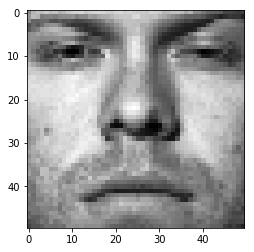

In [2]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    line = line.strip().split()
    train_data.append(imageio.imread(line[0]).reshape(2500,))
    train_labels.append(line[1])

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)

plt.imshow(train_data[10, :].reshape(50,50), cmap=cm.Greys_r)

### Load test data

(100, 2500) (100,)


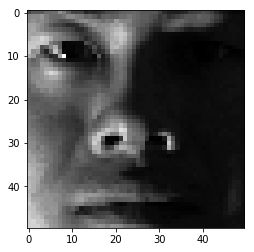

In [29]:
test_data, test_labels = [], []
for line in open('./faces/test.txt'):
    line = line.strip().split()
    test_data.append(imageio.imread(line[0]).reshape(2500,))
    test_labels.append(line[1])

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)

plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)

### Average face μ in training data

(2500,)
[59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852
 59.27592593]


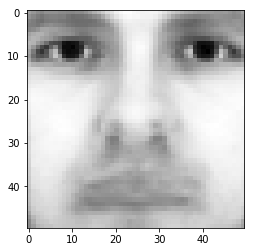

In [4]:
avg_train = np.average(train_data, axis=0)
print(avg_train.shape)
print(avg_train)
plt.imshow(avg_train.reshape(50, 50), cmap=cm.Greys_r)

### Substract μ for both training and test data

In [5]:
train_data_norm = train_data - avg_train
test_data_norm = test_data - avg_train

print((train_data_norm - train_data)[0])
print((test_data_norm - test_data)[0])

[-59.25185185 -56.10185185 -52.42222222 ... -67.22222222 -64.61851852
 -59.27592593]
[-59.25185185 -56.10185185 -52.42222222 ... -67.22222222 -64.61851852
 -59.27592593]


### Perform SVD on training set

u_train (540, 540)
s_train (540, 2500)
vh_train (2500, 2500)


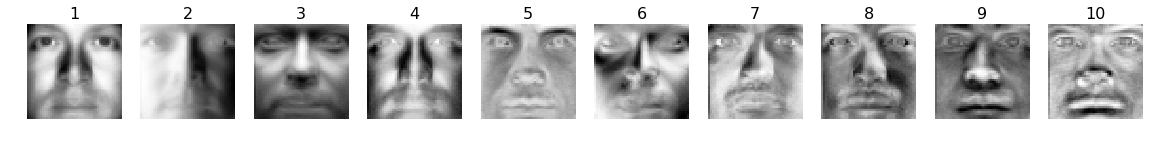

In [19]:
u_train, s_train, vh_train = np.linalg.svd(train_data_norm, full_matrices=True)
s_train = np.diag(s_train)
s_train.resize(train_data_norm.shape)
print("u_train", u_train.shape)
print("s_train", s_train.shape)
print("vh_train", vh_train.shape)

plt.gcf().set_size_inches(20, 20)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(vh_train[i].reshape(50, 50), cmap=cm.Greys_r)
    plt.axis("off")
    plt.title(i + 1, fontsize=16)

### Low-rank Approximation

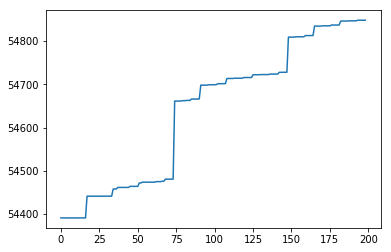

In [20]:
def low_rank_approx(u, s, vh, r):
    X_r = np.dot(np.dot(u[:, :r], s[:r, :r]), vh[:r, :])
    return np.linalg.norm(train_data_norm - X_r, ord='fro')
    
approx_err = []
for r in range(1, 200):
    approx_err.append(low_rank_approx(u_train, s_train, vh_train, r))
    
plt.plot(approx_err)

### Eigenface Feature

In [26]:
def get_eigenface_feature(vh, r, data):
    return np.dot(data, vh[:r, :].T)

# train data
F_train = get_eigenface_feature(vh_train, 10, train_data_norm)
print("F_train:", F_train.shape)

# test data
u_test, s_test, vh_test = np.linalg.svd(test_data_norm, full_matrices=True)
F_test = get_eigenface_feature(vh_test, 10, test_data_norm)
print("F_test:", F_test.shape)

F_train: (540, 10)
F_test: (100, 10)


#### Logistic Regression (r = 10)

In [33]:
clf = LogisticRegression(multi_class='ovr').fit(F_train, train_labels)
clf.score(F_test, test_labels)

0.23

#### Logistic Regression (r = 1, 2, ..., 200)

[0.08, 0.06, 0.06, 0.07, 0.12, 0.1, 0.18, 0.17, 0.18, 0.23, 0.19, 0.22, 0.17, 0.13, 0.18, 0.17, 0.19, 0.17, 0.2, 0.18, 0.17, 0.16, 0.14, 0.16, 0.1, 0.11, 0.11, 0.14, 0.13, 0.14, 0.16, 0.15, 0.14, 0.14, 0.14, 0.13, 0.15, 0.13, 0.15, 0.15, 0.18, 0.19, 0.19, 0.19, 0.19, 0.17, 0.15, 0.09, 0.08, 0.1, 0.11, 0.09, 0.11, 0.1, 0.11, 0.11, 0.12, 0.11, 0.12, 0.16, 0.14, 0.15, 0.16, 0.16, 0.16, 0.15, 0.15, 0.18, 0.15, 0.17, 0.16, 0.16, 0.15, 0.14, 0.12, 0.12, 0.11, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.16, 0.13, 0.12, 0.13, 0.13, 0.13, 0.13, 0.13, 0.14, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13, 0.13, 0.15, 0.14, 0.13, 0.12, 0.14, 0.13, 0.13, 0.15, 0.16, 0.14, 0.16, 0.15, 0.16, 0.15, 0.15, 0.16, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.13, 0.13, 0.15, 0.15, 0.15, 0.14, 0.13, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.13, 0.14, 0.13, 0.12, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14, 0.15, 0.15, 0.15, 0.14, 0.14, 0.15, 0.

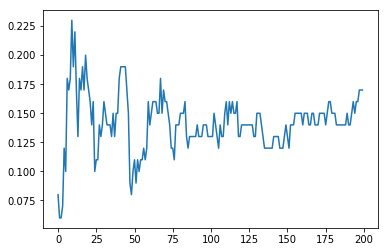

In [32]:
%%time

scores = []
for r in range(1, 201):
    f_train = get_eigenface_feature(vh_train, r, train_data_norm)
    f_test = get_eigenface_feature(vh_test, r, test_data_norm)
    clf = LogisticRegression(multi_class='ovr').fit(f_train, train_labels)
    scores.append(clf.score(f_test, test_labels))

print(scores)
plt.plot(scores)